In [1]:
from dbscan import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Consider euclidian distance

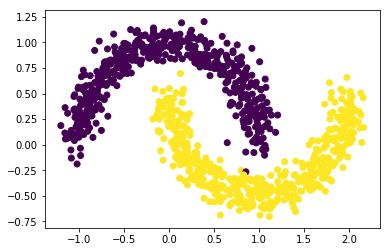

In [2]:
moons = make_moons(n_samples=1000, noise=0.1)

_=plt.scatter(moons[0][:,0],moons[0][:,1],c=moons[1])

In [3]:
prw_dist = pairwise_distances(moons[0])

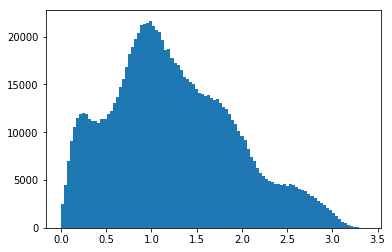

In [4]:
_= plt.hist(prw_dist.flatten(),bins=100)

### 0.32 - is a first pick of distance histogramm 

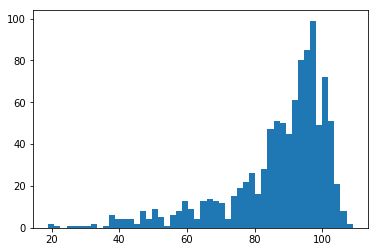

In [5]:
nn = NearestNeighbors(radius = 0.32).fit(moons[0])
nnb_radius = nn.radius_neighbors(moons[0],return_distance=False)
num_of_neighbors = [len(n) for n in nnb_radius]
_=plt.hist(num_of_neighbors, bins=50)

### 89 is choosen pick of neighbors on historagmm for particular distance

100%|██████████| 1000/1000 [00:04<00:00, 200.65it/s]


CPU times: user 4.46 s, sys: 23.7 ms, total: 4.49 s
Wall time: 4.98 s


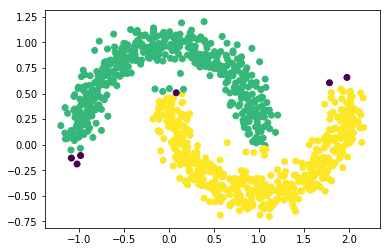

In [8]:
my_dbscan = DBSCAN(eps=0.32, MinPts=89, verbose=True, precomputed=False, metric = 'euclidian')

%time my_dbscan.fit(moons[0])

_=plt.scatter(moons[0][:,0],moons[0][:,1],c=my_dbscan.labels)

### using precomputed distances 

INFO:dbscan:Using precomputed distances
100%|██████████| 1000/1000 [00:00<00:00, 69837.56it/s]


CPU times: user 16.9 ms, sys: 66 µs, total: 16.9 ms
Wall time: 21.8 ms


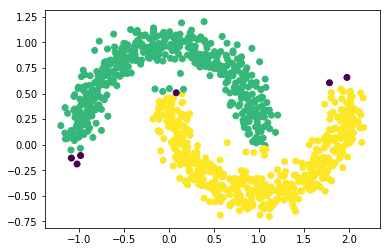

In [9]:
my_dbscan = DBSCAN(eps=0.32, MinPts=89, verbose=True, precomputed=True, metric = 'euclidian')

%time my_dbscan.fit(prw_dist)

_=plt.scatter(moons[0][:,0],moons[0][:,1],c=my_dbscan.labels)

# Consider cosine distance

In [17]:
from sklearn.datasets import make_blobs

def norm_data(data):
    data_matrix = data - np.mean(data, axis=0)
    norm_data_matrix = np.linalg.norm(data_matrix, axis=1)
    data_matrix = data_matrix/norm_data_matrix[np.newaxis,:].T
    return data_matrix

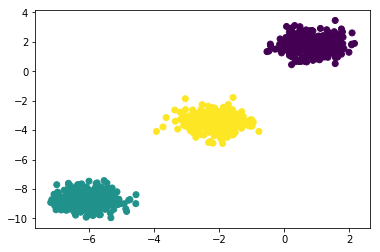

In [20]:
blobs = make_blobs(n_samples=1000, cluster_std=0.5)

_=plt.scatter(blobs[0][:,0],blobs[0][:,1],c=blobs[1])

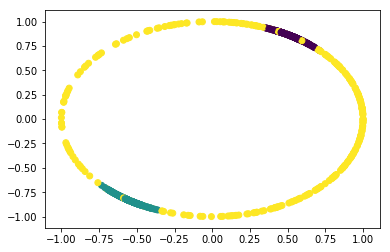

In [21]:
norm_blobs = norm_data(blobs[0])
_=plt.scatter(norm_blobs[:,0],norm_blobs[:,1],c=blobs[1])

### normalized data represantation has changed 

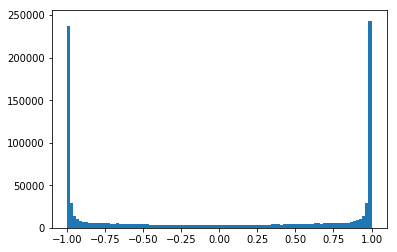

In [22]:
prw_cosine_distance = norm_blobs.dot(norm_blobs.T)
_= plt.hist(prw_cosine_distance.flatten(),bins=100)

### 0.95 - is a first pick of distance histogramm

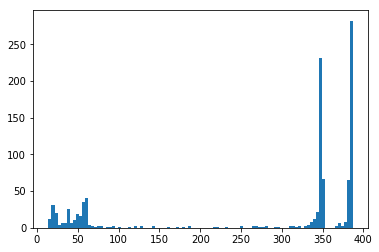

In [23]:
_=plt.hist(np.count_nonzero(prw_cosine_distance>0.95, axis = 1), bins=100)

### 330 is choosen pick of neighbors on historagmm for particular distance

100%|██████████| 1000/1000 [00:12<00:00, 77.18it/s]


CPU times: user 12.4 s, sys: 40.9 ms, total: 12.4 s
Wall time: 13 s


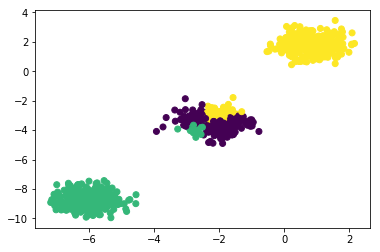

In [24]:
my_dbscan = DBSCAN(eps=0.95, MinPts=330, verbose=True, precomputed=False, metric = 'cosine')

%time my_dbscan.fit(norm_blobs)

_=plt.scatter(blobs[0][:,0],blobs[0][:,1],c=my_dbscan.labels)

### using precomputed distances  

INFO:dbscan:Using precomputed distances
100%|██████████| 1000/1000 [00:00<00:00, 64580.41it/s]


CPU times: user 16 ms, sys: 231 µs, total: 16.2 ms
Wall time: 20.4 ms


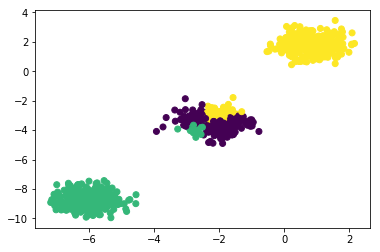

In [26]:
my_dbscan = DBSCAN(eps=0.95, MinPts=330, verbose=True, precomputed=True, metric = 'cosine')

%time my_dbscan.fit(prw_cosine_distance)

_=plt.scatter(blobs[0][:,0],blobs[0][:,1],c=my_dbscan.labels)